In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#list_names = ['User1', 'User3','User4', 'User5', 'User6']#, 'User7']
list_names = ['User3', 'User3']#,'User4', 'User5', 'User6']#, 'User7']

nbUsers = len(list_names)

list_beta = [1.05]
list_gamma = [0]

nbBetaGamma = len(list_beta)

addword = '3s-PosClosest'

In [2]:
nbUsers

2

In [3]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [4]:
globalAnalysis = pd.DataFrame()
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+ addword+ '.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)




In [5]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    

In [49]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 180):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(0, 38):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Closest.'+str(j)] = globalAnalysis[cond]['DistToClos.'+str(j)].mean()

            #meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Speed.'+str(j)] = abs(globalAnalysis[cond]['Speed.'+str(j)].mean())

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [50]:
meanUsers.index

Int64Index([1880, 1870, 1860, 1850, 1840, 1830, 1820, 1810, 1800, 1790,
            ...
             180,  170,  160,  150,  140,  130,  120,  110,  100,    0],
           dtype='int64', length=180)

In [51]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 180):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [52]:
allConfig = pd.DataFrame()

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-AllConfigTypes-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Config'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Config'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary.index = betaGammaSummary['Tolerance']
        #betaGammaSummary['Beta'] = float(beta)
        #betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        allConfig = pd.concat([betaGammaSummary, allConfig], axis = 0, sort = True)

In [53]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.100  DistBoneInTolTime.1000  \
0       0                  0.0                    NaN                     NaN   
1       1                  0.0              23.963700               40.072650   
2       2                  0.0                    NaN                     NaN   
3       3                  0.0               4.636933               67.252667   
4       4                  0.0                    NaN               76.217725   

   DistBoneInTolTime.1010  DistBoneInTolTime.1020  DistBoneInTolTime.1030  \
0              126.295100                     NaN                     NaN   
1               37.930267               26.864667               25.032020   
2                     NaN               20.423900               72.741700   
3               53.265933               56.511775               42.059475   
4               86.136350                     NaN                     NaN   

   DistBoneInTolTime.1040  DistBoneInTolTime.1050  DistBoneInTolTime.1060  \
0                     NaN                     NaN              137.811300   
1               34.080233               50.284700               31.004233   
2               11.510050               32.907100                     NaN   
3               51.080733               51.080733               80.632425   
4               74.173700               57.407280               66.537900   

   ...  DistanceInTolTime.940  DistanceInTolTime.950  DistanceInTolTime.960  \
0  ...                    NaN                    NaN             232.156793   
1  ...              50.416006              55.636605              31.875316   
2  ...              21.950639                    NaN                    NaN   
3  ...               0.003104              31.788001              19.900754   
4  ...              39.770529              23.060049              42.029722   

   DistanceInTolTime.970  DistanceInTolTime.980  DistanceInTolTime.990   Obj  \
0                    NaN                    NaN                    NaN  obj0   
1              36.155089              67.024283              40.997468  obj0   
2              61.235565                    NaN              21.801028  obj0   
3              24.773474               8.931804               8.931804  obj0   
4                    NaN                    NaN              62.693161  obj0   

   Scale       Task   User  
0  small      Touch  User3  
1  small      Raise  User3  
2  small       Pull  User3  
3  small       Push  User3  
4  small  Push Down  User3  

[5 rows x 892 columns]

In [54]:
#Mean per config, All users?

In [55]:
meanPerScale.tail()

Beta  Gamma      large    medium     small
130  1.05    0.0   4.346854  6.937326  8.451610
120  1.05    0.0  14.524676  6.908330  7.069400
110  1.05    0.0   2.242557  8.406955  8.827249
100  1.05    0.0   8.542770  6.658336  6.701657
0    1.05    0.0   6.311328  4.870097  5.215166

In [56]:
globalAnalysis

Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  \
Tolerance                                                           
0          1.05    0.000000    0.000000     0.000000     0.000000   
100        1.05   19.846600   19.846600     6.470300     1.089800   
110        1.05         NaN         NaN    11.663767    22.820650   
120        1.05    2.091100    2.091100     4.728100     3.646800   
130        1.05   21.668900   21.668900     5.368550     4.723283   
140        1.05         NaN         NaN     3.486280     5.614618   
150        1.05   15.385000   15.385000     4.817140     6.889817   
160        1.05   15.605450   15.605450     9.775700    10.114317   
170        1.05   20.601000   20.601000     9.311675    13.251631   
180        1.05         NaN         NaN    10.661650    11.843025   
190        1.05         NaN         NaN     0.623600    10.187160   
200        1.05   25.880900   25.880900     5.535175     4.336456   
210        1.05   24.899000   24.899000     6.783250     8.083800   
220        1.05   22.072450   22.072500    13.025750    23.328771   
230        1.05         NaN         NaN     8.722929     8.775325   
240        1.05   15.793467   15.793467     8.795125    10.474571   
250        1.05         NaN         NaN     9.559400    13.871707   
260        1.05    1.548200    1.548200    12.530467     9.485011   
270        1.05   42.706850   42.706850    17.387160    27.017457   
280        1.05         NaN         NaN     8.690200    23.421890   
290        1.05         NaN         NaN     3.983750     9.954800   
300        1.05   12.676400   12.676400     9.792340    15.875633   
310        1.05   27.860400   27.860400    11.587960    13.265120   
320        1.05   32.004100   32.004100    30.869800    24.420478   
330        1.05   17.032900   17.032900    12.100850    18.470838   
340        1.05    2.105700    2.105700    14.516471    22.659920   
350        1.05         NaN         NaN    26.632425    50.398000   
360        1.05    8.802400    8.802400    16.189417    14.324525   
370        1.05   38.940650   38.940650     6.237067    13.905029   
380        1.05         NaN         NaN    27.440733    23.436460   
...         ...         ...         ...          ...          ...   
2750       1.05  229.343900  229.343900   232.385025   100.382367   
2760       1.05         NaN         NaN    92.015350   148.003050   
2770       1.05         NaN         NaN    80.361233   137.614600   
2780       1.05         NaN         NaN    91.552450    97.590550   
2790       1.05  179.670300  179.670300    61.571280   264.539600   
2800       1.05   87.005950   87.005950   142.552275    93.535750   
2810       1.05    7.570200    7.570200    67.740300   130.234837   
2820       1.05   16.209800   16.209800   140.254033   232.934957   
2830       1.05         NaN         NaN    10.768000    72.591200   
2840       1.05  490.494100  490.494100   179.671800   122.376900   
2850       1.05  108.123800  108.123800     5.991000    25.086950   
2860       1.05         NaN         NaN   231.155167   222.913500   
2870       1.05   62.118400   62.118400   101.673967   114.951457   
2880       1.05  180.434400  180.434400    95.153420   176.886400   
2890       1.05         NaN         NaN    51.616350   221.685800   
2900       1.05   30.045700   30.045700    84.220767    21.853975   
2910       1.05  108.188500  108.188500   107.755867   405.997300   
2920       1.05         NaN         NaN   128.616880   142.376600   
2930       1.05   21.950600   21.950600   201.326600    87.242025   
2940       1.05  489.014600  489.014600   126.493840   175.107920   
2960       1.05  108.546700  108.546700          NaN    81.254500   
2970       1.05  178.524900  178.524900    36.256500   141.903400   
2980       1.05   38.265600   38.265600   212.402433   301.664500   
2990       1.05   30.876100   30.876100   109.099467   118.157783   
3000       1.05         NaN         NaN   126.214425   217.153743   
3010     

In [57]:
analysisPerTask.head()

Beta  Gamma      Pull      Push  Push Down      Raise  Tolerance  \
Tolerance                                                                     
0          1.05    0.0  4.968830  5.778905   4.594379   4.820549          0   
100        1.05    0.0  5.243312  5.726395   2.764836  10.511576        100   
110        1.05    0.0  6.141645  7.811788   5.124193   9.647091        110   
120        1.05    0.0  6.493073  6.832856   5.343147  10.292686        120   
130        1.05    0.0  8.152709  7.532461   5.630484   8.585348        130   

               Touch   User  
Tolerance                    
0           6.739179  User3  
100         4.721245  User3  
110        10.265396  User3  
120        11.124556  User3  
130         5.018737  User3

In [58]:
globalAnalysis.iloc[1]

Beta                          1.05
BoneDist.0                 19.8466
BoneDist.1                 19.8466
BoneDist.10                 6.4703
BoneDist.11                 1.0898
BoneDist.12                6.63809
BoneDist.13                3.75717
BoneDist.14                3.23048
BoneDist.15                6.89194
BoneDist.16                 3.3801
BoneDist.17                 2.3087
BoneDist.18                3.26238
BoneDist.19                 1.9721
BoneDist.2                     NaN
BoneDist.20                 1.9721
BoneDist.21                 1.1701
BoneDist.22                2.29737
BoneDist.23                3.83637
BoneDist.24                6.51851
BoneDist.25                4.10345
BoneDist.26                4.57665
BoneDist.27                4.45077
BoneDist.28                5.88208
BoneDist.29                3.33945
BoneDist.3                     NaN
BoneDist.30                3.82035
BoneDist.31                 6.0656
BoneDist.32                3.71348
BoneDist.33         

In [71]:
globalAnalysis[cond]['DistToClos.'+str(fingertip)].dropna()

Tolerance
3040    135.920559
3040    135.920559
Name: DistToClos.37, dtype: float64

In [74]:
tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    totalClos = 0
    for fingertip in range(6, 19, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()
            totalClos = totalClos + globalAnalysis[cond]['DistToClos.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal
    globalAnalysis.loc[tol, 'R-ClosFingerTips_'+str(list_names[user])] = totalClos/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        totalClos = 0
        for fingertip in range(6, 19, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()
                totalClos = totalClos + globalAnalysis[cond]['DistToClos.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal
        globalAnalysis.loc[tol, 'R-ClosFingerTips_'+str(list_names[user])] = totalClos/nbPhal
        
        
tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    totalClos = 0
    for fingertip in range(25, 38, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()
            totalClos = totalClos + globalAnalysis[cond]['DistToClos.'+str(fingertip)].dropna().mean()

            
    globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal
    globalAnalysis.loc[tol, 'L-ClosFingerTips_'+str(list_names[user])] = totalClos/nbPhal
        


for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        totalClos = 0
        for fingertip in range(25, 38, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()
                totalClos = totalClos + globalAnalysis[cond]['DistToClos.'+str(fingertip)].dropna().mean()
    
        globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal
        globalAnalysis.loc[tol, 'L-ClosFingerTips_'+str(list_names[user])] = totalClos/nbPhal
        



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
-2.3690212857142896
-2.1358741428571664
-0.10150414285719656
-3.5920061428572283
-2.3690212857142896
-2.1358741428571664
-0.10150414285719656
-3.5920061428572283
0.6952180000000308
4.581221999999966
6.237712000000019
9.307672000000016
13.23094000000002
0.6952180000000308
4.581221999999966
6.237712000000019
9.307672000000016
13.23094000000002
1.47618123529413
1.0088170534759509
-0.7444929465240648
-0.11151151795264147
-0.675274767952625
1.47618123529413
1.0088170534759509
-0.7444929465240648
-0.11151151795264147
-0.675274767952625
0.5392103913043609
0.18715010559008
-1.501259894409879
-3.167405449965412
-2.6421303071082605
0.5392103913043609
0.18715010559008
-1.501259894409879
-3.167405449965412
-2.6421303071082605
-0.287091615384645
0.4985723846153698
10.420351273504268
12.85918984493283
13.915897844932834
-0.287091615384645
0.4985723846153698
10.420351273504268
12.85918984493283
13.915897844932834
1.7493429999999948
1.2851581111110812
1.38143977

42.06167199999998
51.840874500000005
58.11150116666664
59.22414416666663
7.980500142857139
30.770339857142833
42.4628529340659
49.40949293406589
60.6949161972238
7.980500142857139
30.770339857142833
42.4628529340659
49.40949293406589
60.6949161972238
5.107283909090921
19.346279909090917
47.66839490909093
68.10714337062939
93.30600137062936
5.107283909090921
19.346279909090917
47.66839490909093
68.10714337062939
93.30600137062936
8.906119666666676
27.312646743589788
35.84760341025643
52.85012769597074
81.83971791819295
8.906119666666676
27.312646743589788
35.84760341025643
52.85012769597074
81.83971791819295
21.22336142105268
54.01563063844396
73.90564063844396
93.60740063844395
113.05068530511059
21.22336142105268
54.01563063844396
73.90564063844396
93.60740063844395
113.05068530511059
21.243421571428566
29.601379417582425
56.272976560439595
83.06608031043956
115.1991283104395
21.243421571428566
29.601379417582425
56.272976560439595
83.06608031043956
115.1991283104395
50.44768049999999

156.4347898412698
36.18232936363636
70.52614512834225
113.71085655691368
146.95256655691367
177.2262391023682
36.18232936363636
70.52614512834225
113.71085655691368
146.95256655691367
177.2262391023682
30.02979300000001
59.605997000000045
98.69199469230774
136.8746313589744
183.01437288838616
30.02979300000001
59.605997000000045
98.69199469230774
136.8746313589744
183.01437288838616
7.577759666666674
47.3238886666667
93.83840219607848
138.8818700908153
177.00414142414866
7.577759666666674
47.3238886666667
93.83840219607848
138.8818700908153
177.00414142414866
36.87432077777778
90.05356763492067
139.26590207936513
187.41330096825402
239.66818563492066
36.87432077777778
90.05356763492067
139.26590207936513
187.41330096825402
239.66818563492066
75.36231607692311
141.304097
175.4290458235294
217.720697
261.043335
75.36231607692311
141.304097
175.4290458235294
217.720697
261.043335
34.89708633333335
94.76113033333334
165.44154033333336
187.0875836666667
252.3976873809524
34.89708633333335
9

102.86355151127822
134.89704739363117
174.15626406029787
227.41479634601222
61.393465727272776
113.12641588111896
181.23805032556342
242.4263174684206
285.62488092296604
61.393465727272776
113.12641588111896
181.23805032556342
242.4263174684206
285.62488092296604
41.24394300000002
105.64646783333339
141.40103430392162
180.75900930392163
220.68437730392162
41.24394300000002
105.64646783333339
141.40103430392162
180.75900930392163
220.68437730392162
57.62687300000002
117.9756645
162.31903685294117
197.773404747678
243.75379547495072
57.62687300000002
117.9756645
162.31903685294117
197.773404747678
243.75379547495072
81.41030728571431
155.41526684126987
199.23267559126987
229.53064114682542
290.5913724801587
81.41030728571431
155.41526684126987
199.23267559126987
229.53064114682542
290.5913724801587
25.0265305
73.26980116666664
147.677912595238
236.62311592857134
281.33375392857135
25.0265305
73.26980116666664
147.677912595238
236.62311592857134
281.33375392857135
81.67426299999995
160.27

149.0121423846154
190.5600323846154
245.9568577692308
284.4119757692308
49.533226333333346
122.44818588888891
169.1783616031746
240.26433826984123
292.97700626984124
49.533226333333346
122.44818588888891
169.1783616031746
240.26433826984123
292.97700626984124
42.943393
101.16839111764708
130.51743566310162
148.56577899643494
193.25886842500634
42.943393
101.16839111764708
130.51743566310162
148.56577899643494
193.25886842500634
61.64630209090908
140.88318386868684
219.99466136868685
260.1623999401154
322.41065127344865
61.64630209090908
140.88318386868684
219.99466136868685
260.1623999401154
322.41065127344865
58.9829485555556
92.76939700000005
140.50645700000004
185.83232414285723
228.0482850000001
58.9829485555556
92.76939700000005
140.50645700000004
185.83232414285723
228.0482850000001
87.9905596666667
121.07176366666668
176.812467
240.82153811111112
289.5446977777778
87.9905596666667
121.07176366666668
176.812467
240.82153811111112
289.5446977777778
78.83613744444443
132.5077858888

90.35563300000004
143.9097941428572
218.60438414285719
341.9532941428572
403.13794547619057
90.35563300000004
143.9097941428572
218.60438414285719
341.9532941428572
403.13794547619057
71.50242300000005
98.56136033333334
127.12059477777781
157.15926477777782
188.9812827777779
71.50242300000005
98.56136033333334
127.12059477777781
157.15926477777782
188.9812827777779
68.69145300000001
90.4318855714286
134.6885755714286
178.38497446031752
214.74487996031752
68.69145300000001
90.4318855714286
134.6885755714286
178.38497446031752
214.74487996031752
65.54763299999995
134.77783699999992
193.54406033333328
265.31489033333327
344.66560833333335
65.54763299999995
134.77783699999992
193.54406033333328
265.31489033333327
344.66560833333335
80.74277481818183
176.41090738961043
252.70270988961045
335.45371988961045
397.9718045562771
80.74277481818183
176.41090738961043
252.70270988961045
335.45371988961045
397.9718045562771
49.80003050000001
126.17922200000001
166.40696200000002
262.08204342857147
2

287.12151261904756
54.35650728571427
122.5259362857143
210.55945128571432
272.86339461904765
287.12151261904756
69.71946442857147
100.9744017619048
126.92692509523812
159.57246009523814
225.3287780952382
69.71946442857147
100.9744017619048
126.92692509523812
159.57246009523814
225.3287780952382
68.92573585714284
132.57376485714286
190.40026735714287
259.83182735714286
275.1670953571428
68.92573585714284
132.57376485714286
190.40026735714287
259.83182735714286
275.1670953571428
46.15897299999998
80.17197700000003
147.52516700000007
218.37167700000012
216.8683450000001
46.15897299999998
80.17197700000003
147.52516700000007
218.37167700000012
216.8683450000001
17.911373000000005
139.89615700000002
152.33484699999994
228.57928199999998
281.7085000000001
17.911373000000005
139.89615700000002
152.33484699999994
228.57928199999998
281.7085000000001
81.12612299999998
118.28418700000003
165.59224842857145
298.5148584285715
365.17057642857145
81.12612299999998
118.28418700000003
165.592248428571

In [60]:
for user in range(0, nbUsers):
    cond = globalAnalysis['User'] == list_names[user]
    globalAnalysis.loc[cond, 'R-FingerTips'] = globalAnalysis[cond]['R-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'R-BonesFingerTips'] = globalAnalysis[cond]['R-BonesFingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond, 'L-FingerTips'] = globalAnalysis[cond]['L-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'L-BonesFingerTips'] = globalAnalysis[cond]['L-BonesFingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond, 'R-ClosFingerTips'] = globalAnalysis[cond]['R-ClosFingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond, 'L-FingerTips'] = globalAnalysis[cond]['L-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond, 'L-ClosFingerTips'] = globalAnalysis[cond]['L-ClosFingerTips_'+str(list_names[user])]
    
    

In [67]:
globalAnalysis[cond]['DistToClos.'+str(fingertip)].dropna().mean()

55.021115695278006

In [68]:
globalAnalysis['R-ClosFingerTips_'+str(list_names[user])]


Tolerance
0      NaN
100    NaN
110    NaN
120    NaN
130    NaN
140    NaN
150    NaN
160    NaN
170    NaN
180    NaN
190    NaN
200    NaN
210    NaN
220    NaN
230    NaN
240    NaN
250    NaN
260    NaN
270    NaN
280    NaN
290    NaN
300    NaN
310    NaN
320    NaN
330    NaN
340    NaN
350    NaN
360    NaN
370    NaN
380    NaN
        ..
2750   NaN
2760   NaN
2770   NaN
2780   NaN
2790   NaN
2800   NaN
2810   NaN
2820   NaN
2830   NaN
2840   NaN
2850   NaN
2860   NaN
2870   NaN
2880   NaN
2890   NaN
2900   NaN
2910   NaN
2920   NaN
2930   NaN
2940   NaN
2960   NaN
2970   NaN
2980   NaN
2990   NaN
3000   NaN
3010   NaN
3020   NaN
3030   NaN
3040   NaN
2950   NaN
Name: R-ClosFingerTips_User3, Length: 592, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


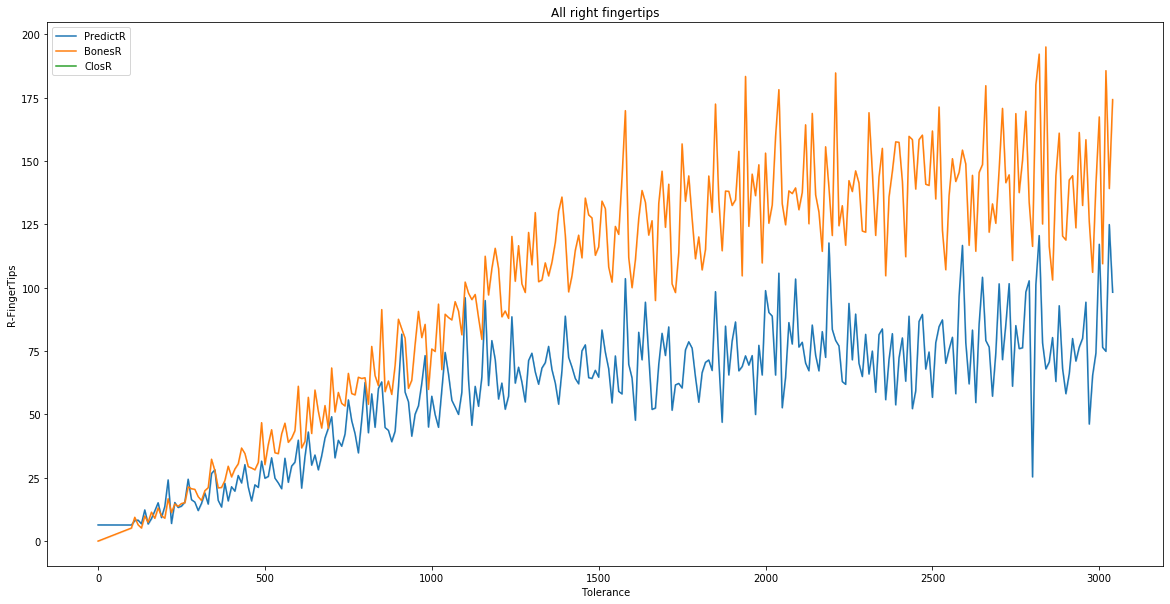

In [62]:
plt.figure(figsize = (20, 10))
#for user in range(0, nbUsers):
#    cond = (globalAnalysis['User'] == list_names[user])

sns.lineplot( x = 'Tolerance', y = 'R-FingerTips', data = globalAnalysis, label = 'PredictR')#+str(list_names[user]))
sns.lineplot( x = 'Tolerance', y = 'R-BonesFingerTips', data = globalAnalysis, label = 'BonesR')#+str(list_names[user]))
sns.lineplot( x = 'Tolerance', y = 'R-ClosFingerTips', data = globalAnalysis, label = 'ClosR')#+str(list_names[user]))

#sns.lineplot( x = 'Tolerance', y = 'L-FingerTips', data = globalAnalysis, label = 'PredictL')#+str(list_names[user]))
#sns.lineplot( x = 'Tolerance', y = 'L-BonesFingerTips', data = globalAnalysis, label = 'BonesL')#+str(list_names[user]))
plt.title('All right fingertips')
#plt.ylim(0,200)
plt.legend()

In [20]:
tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(0, 19):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(0, 19):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(25, 30, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(25, 30, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal



In [21]:
for user in range(0, nbUsers):
    cond = globalAnalysis['User'] == list_names[user]
    globalAnalysis.loc[cond, 'R-FingerTips'] = globalAnalysis[cond]['R-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'R-BonesFingerTips'] = globalAnalysis[cond]['R-BonesFingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond, 'L-FingerTips'] = globalAnalysis[cond]['L-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'L-BonesFingerTips'] = globalAnalysis[cond]['L-BonesFingerTips_'+str(list_names[user])]
    
    

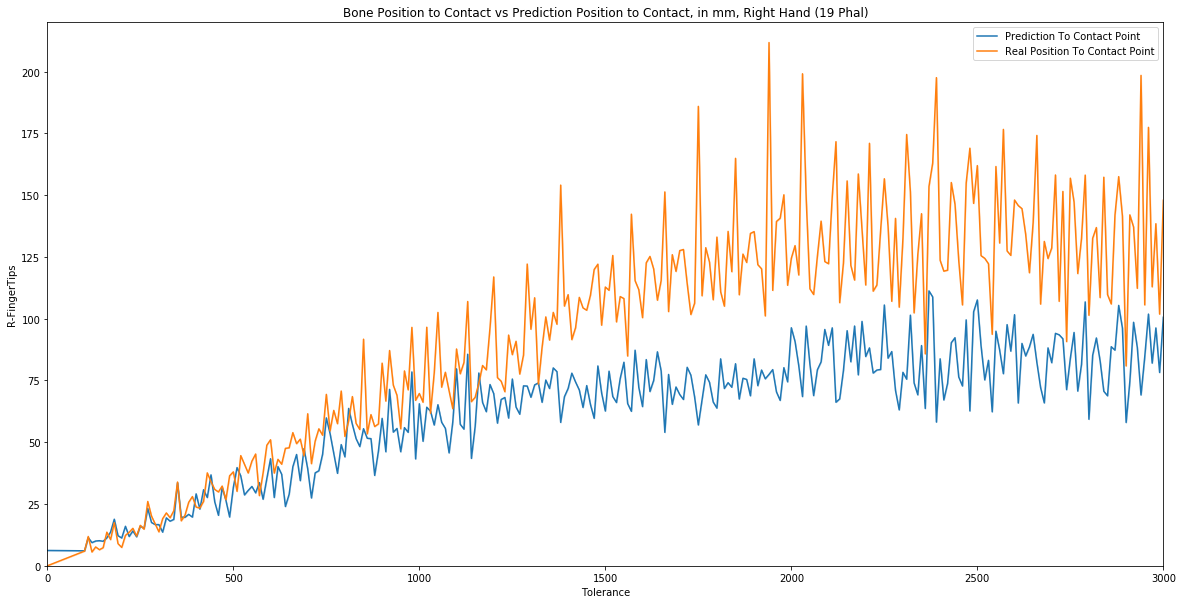

In [22]:
plt.figure(figsize = (20, 10))
#for user in range(0, nbUsers):
#    cond = (globalAnalysis['User'] == list_names[user])

sns.lineplot( x = 'Tolerance', y = 'R-FingerTips', data = globalAnalysis, label = 'Prediction To Contact Point')#+str(list_names[user]))
sns.lineplot( x = 'Tolerance', y = 'R-BonesFingerTips', data = globalAnalysis, label = 'Real Position To Contact Point')#+str(list_names[user]))

#sns.lineplot( x = 'Tolerance', y = 'L-FingerTips', data = globalAnalysis, label = 'PredictL')#+str(list_names[user]))
#sns.lineplot( x = 'Tolerance', y = 'L-BonesFingerTips', data = globalAnalysis, label = 'BonesL')#+str(list_names[user]))
plt.title('Bone Position to Contact vs Prediction Position to Contact, in mm, Right Hand (19 Phal)')
plt.xlim(0,3000)
plt.ylim(0,220)
plt.legend()

In [23]:
meanUsers.head()

Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  BoneDist.12  \
1880  1.05         NaN         NaN    66.702960   144.463650   181.462522   
1870  1.05    129.8074    129.8074    93.983317    99.471050    99.470040   
1860  1.05         NaN         NaN    62.194857   112.769600   140.553629   
1850  1.05    302.5770    302.5770   160.383867   118.710544   218.187209   
1840  1.05     54.2679     54.2679   142.245875   193.729138   125.093000   

      BoneDist.13  BoneDist.14  BoneDist.15  BoneDist.16  ...  Phalanx.34  \
1880    73.070225    91.854388    126.68988   139.560100  ...   65.059511   
1870    93.853440   131.965600     54.67659   100.598240  ...   62.997103   
1860    32.542267   109.899343    138.53215    82.484900  ...   67.121992   
1850   246.542667   118.220879    154.48020   125.081020  ...   68.149583   
1840   181.166040   156.904522    146.05176    34.796733  ...   79.968474   

      Phalanx.35  Phalanx.36  Phalanx.37   Phalanx.4   Phalanx.5   Phalanx.6  \
1880   71.811769   56.231218   62.691560   21.825990  161.359940   99.826043   
1870   71.811769   67.560612   79.893720   77.065457  157.443440   50.614935   
1860   66.645922   67.149601   83.721135   76.202090   13.190907   72.729318   
1850   61.883103   62.004641   80.685754  134.036090   96.794507  121.220666   
1840   80.684991   60.390939   76.601720  109.666540   54.185473   80.196399   

       Phalanx.7  Phalanx.8   Phalanx.9  
1880   48.143265  40.649199   36.290594  
1870  117.286940  91.037988   82.362359  
1860   56.409373  88.842814   46.855824  
1850   57.353540  96.060454  136.866733  
1840  106.344190  99.374166   61.864231  

[5 rows x 78 columns]

In [24]:
analysisPerScale.index[:3300]

Int64Index([   0,  100,  110,  120,  130,  140,  150,  160,  170,  180,
            ...
            2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3030, 3040],
           dtype='int64', name='Tolerance', length=592)

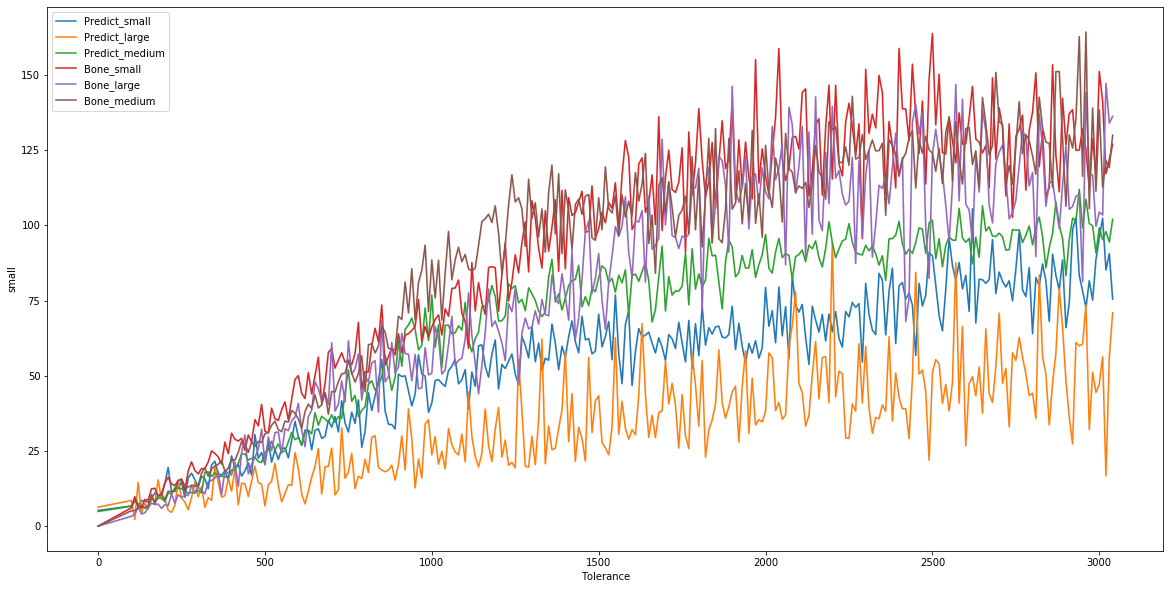

In [25]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = analysisPerScale[:3300], label = 'Predict_small')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = analysisPerScale[:3300], label = 'Predict_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = analysisPerScale[:3300], label = 'Predict_medium')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = analysisBoneDistPerScale[:3300], label = 'Bone_small')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = analysisBoneDistPerScale[:3300], label = 'Bone_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = analysisBoneDistPerScale[:3300], label = 'Bone_medium')


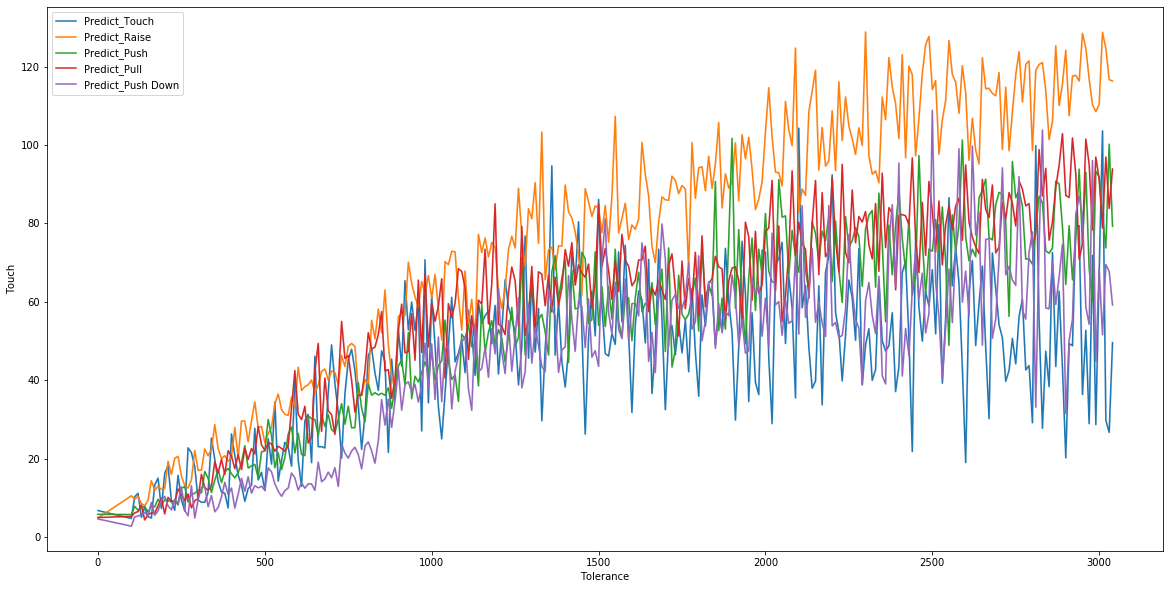

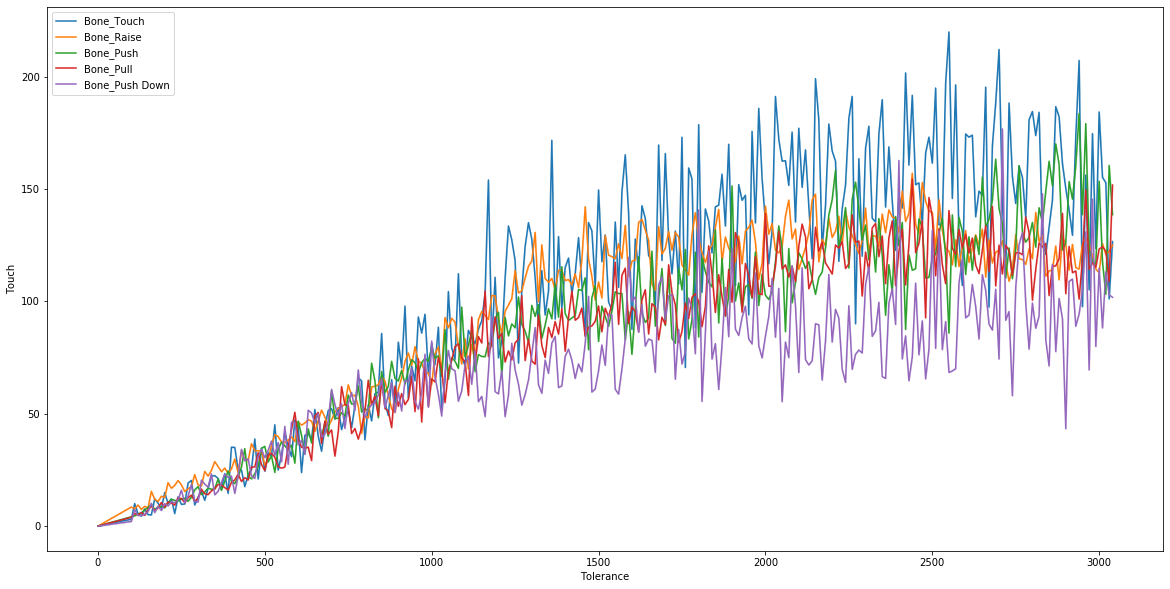

In [26]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')


plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')




In [27]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.100  DistBoneInTolTime.1000  \
0       0                  0.0                    NaN                     NaN   
1       1                  0.0              23.963700               40.072650   
2       2                  0.0                    NaN                     NaN   
3       3                  0.0               4.636933               67.252667   
4       4                  0.0                    NaN               76.217725   

   DistBoneInTolTime.1010  DistBoneInTolTime.1020  DistBoneInTolTime.1030  \
0              126.295100                     NaN                     NaN   
1               37.930267               26.864667               25.032020   
2                     NaN               20.423900               72.741700   
3               53.265933               56.511775               42.059475   
4               86.136350                     NaN                     NaN   

   DistBoneInTolTime.1040  DistBoneInTolTime.1050  DistBoneInTolTime.1060  \
0                     NaN                     NaN              137.811300   
1               34.080233               50.284700               31.004233   
2               11.510050               32.907100                     NaN   
3               51.080733               51.080733               80.632425   
4               74.173700               57.407280               66.537900   

   ...  DistanceInTolTime.940  DistanceInTolTime.950  DistanceInTolTime.960  \
0  ...                    NaN                    NaN             232.156793   
1  ...              50.416006              55.636605              31.875316   
2  ...              21.950639                    NaN                    NaN   
3  ...               0.003104              31.788001              19.900754   
4  ...              39.770529              23.060049              42.029722   

   DistanceInTolTime.970  DistanceInTolTime.980  DistanceInTolTime.990   Obj  \
0                    NaN                    NaN                    NaN  obj0   
1              36.155089              67.024283              40.997468  obj0   
2              61.235565                    NaN              21.801028  obj0   
3              24.773474               8.931804               8.931804  obj0   
4                    NaN                    NaN              62.693161  obj0   

   Scale       Task   User  
0  small      Touch  User3  
1  small      Raise  User3  
2  small       Pull  User3  
3  small       Push  User3  
4  small  Push Down  User3  

[5 rows x 892 columns]

In [29]:
allConfig['DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig.loc[allConfig['DistanceInTolTime.0'] <= 0, 'DistInTolTime.0'] = 0
#allConfig.loc[allConfig['DistanceInTolTime.0'] > 0, 'DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
#allConfig['AbsSpeed.0'] = abs(allConfig['Speed.0'])

for tol in range(100, 2050, 10):
    allConfig['DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] <= 0, 'DistInTolTime.'+str(tol)] = 0
    #allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] > 0, 'DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    #allConfig['AbsSpeed.'+str(tol)] = abs(allConfig['Speed.'+str(tol)])

In [ ]:
#speedTol = pd.DataFrame()
#i = 0
#speedTol.loc[0, 'AbsSpeed'] = allConfig['AbsSpeed.0'].dropna().mean()
#for user in range(0, nbUsers):
#    cond = allConfig['User'] == list_names[user]
#    speedTol.loc[0, list_names[user]] = allConfig[cond]['AbsSpeed.0'].dropna().mean()
#    for tol in range(300, 2050, 50):
#        speedTol.loc[tol, 'AbsSpeed'] = allConfig['AbsSpeed.'+str(tol)].dropna().mean()
#        speedTol.loc[tol, list_names[user]] = allConfig[cond]['AbsSpeed.'+str(tol)].dropna().mean()
#    
#    

In [30]:
#speedTol

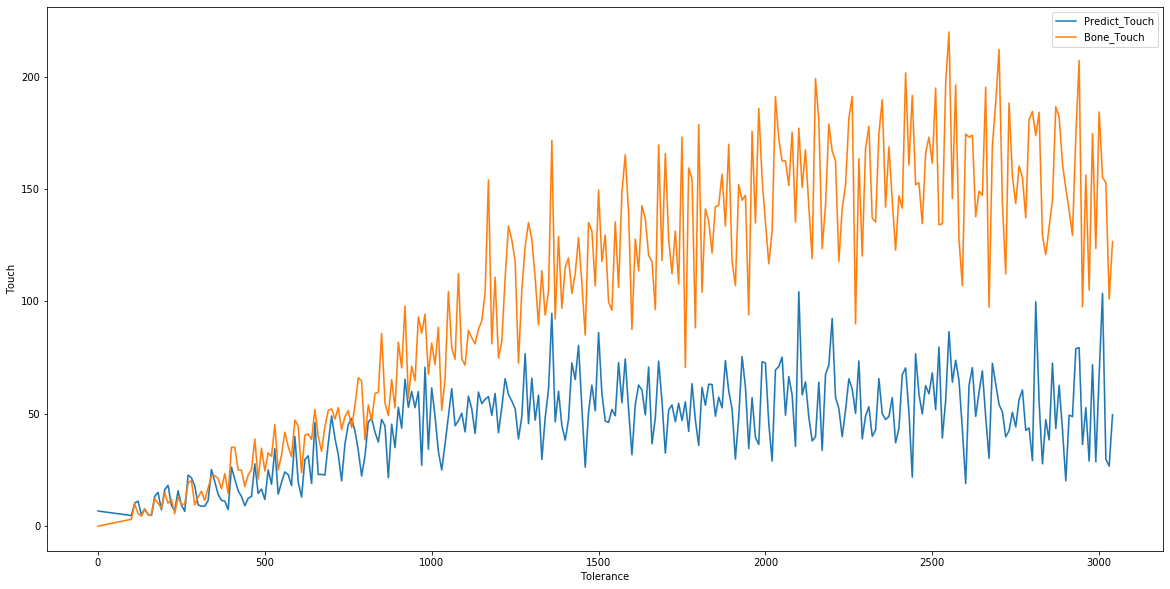

In [31]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')

#alphaplot = sns.lineplot(x = speedTol.index, y = 'AbsSpeed', data = speedTol, label = 'MeanSpeed')


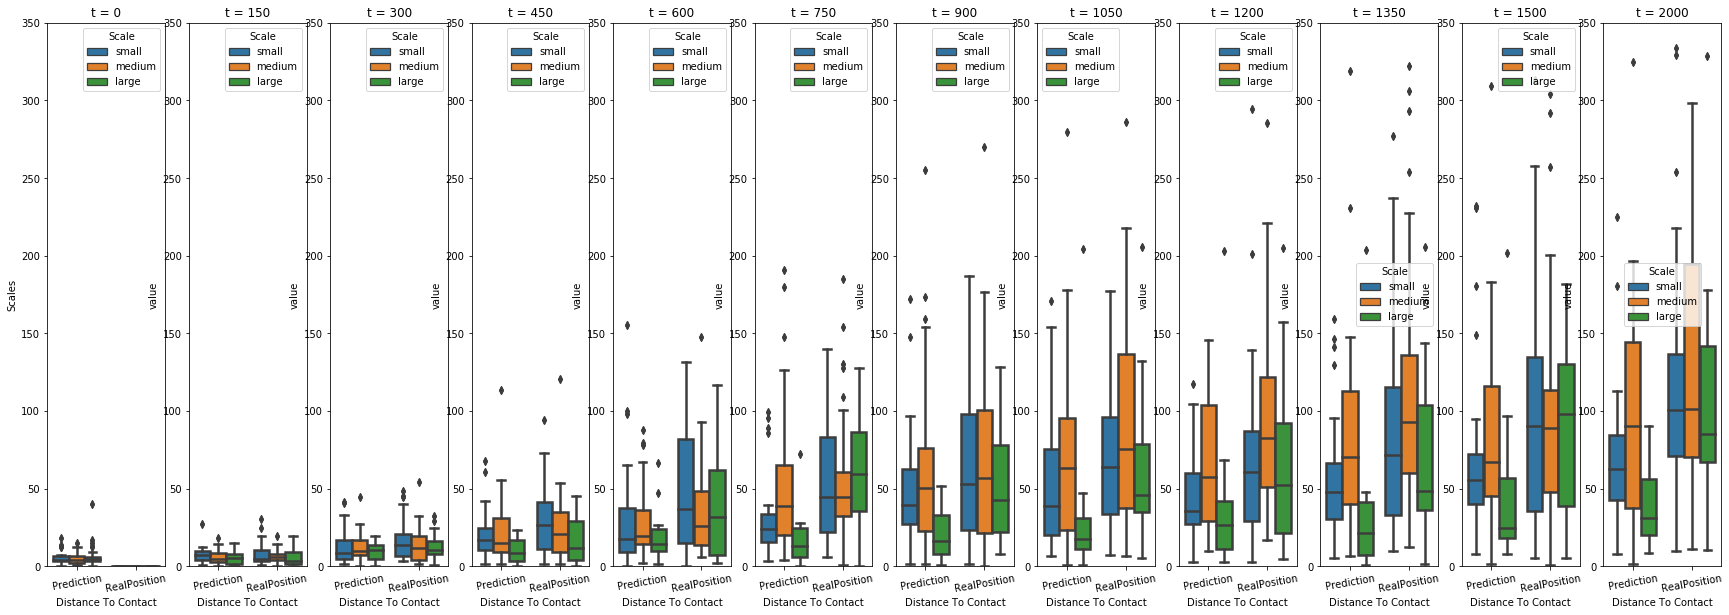

In [32]:
nameAx = []
nameFig = []
#tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
tolTime = [0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 2000]
lim = [50, 150, 300, 300, 300, 300, 400, 400, 400, 500, 500, 500]
for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):

    mdf = pd.DataFrame()
    cdf = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1 = pd.DataFrame(allConfig['DistInTolTime.'+str(tolTime[i])]).assign(Trial=1)
    df1['Scale'] = allConfig['Scale']
    df2 = pd.DataFrame(allConfig['DistBoneInTolTime.'+str(tolTime[i])]).assign(Trial=2)
    df2['DistInTolTime.'+str(tolTime[i])] = allConfig['DistBoneInTolTime.'+str(tolTime[i])]
    df2['Scale'] = allConfig['Scale']
    df2.assign(Trial=2)
    cdf = pd.concat([df1, df2], sort = False)                                # CONCATENATE
    mdf = pd.melt(cdf, id_vars=['Trial','Scale'],value_vars='DistInTolTime.'+str(tolTime[i]), var_name = 'DistInTolTime.'+str(tolTime[i]))

    nameFig[i] = sns.boxplot(x="Trial", y="value", hue = 'Scale', data=mdf, linewidth = 2.5, ax = nameAx[i])  # RUN PLOT   
    #nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('Distance To Contact')#, t ='+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    #nameFig[i].set_ylim(0, lim[i])
    
for ax in nameFig:
    tl = ['Prediction', 'RealPosition']#ax.get_xticklabels()#['Prediction/Contact', 'RealPosition/Contact'])
    ax.set_xticklabels(tl, rotation=10)
    ax.set_ylim(0, 350)


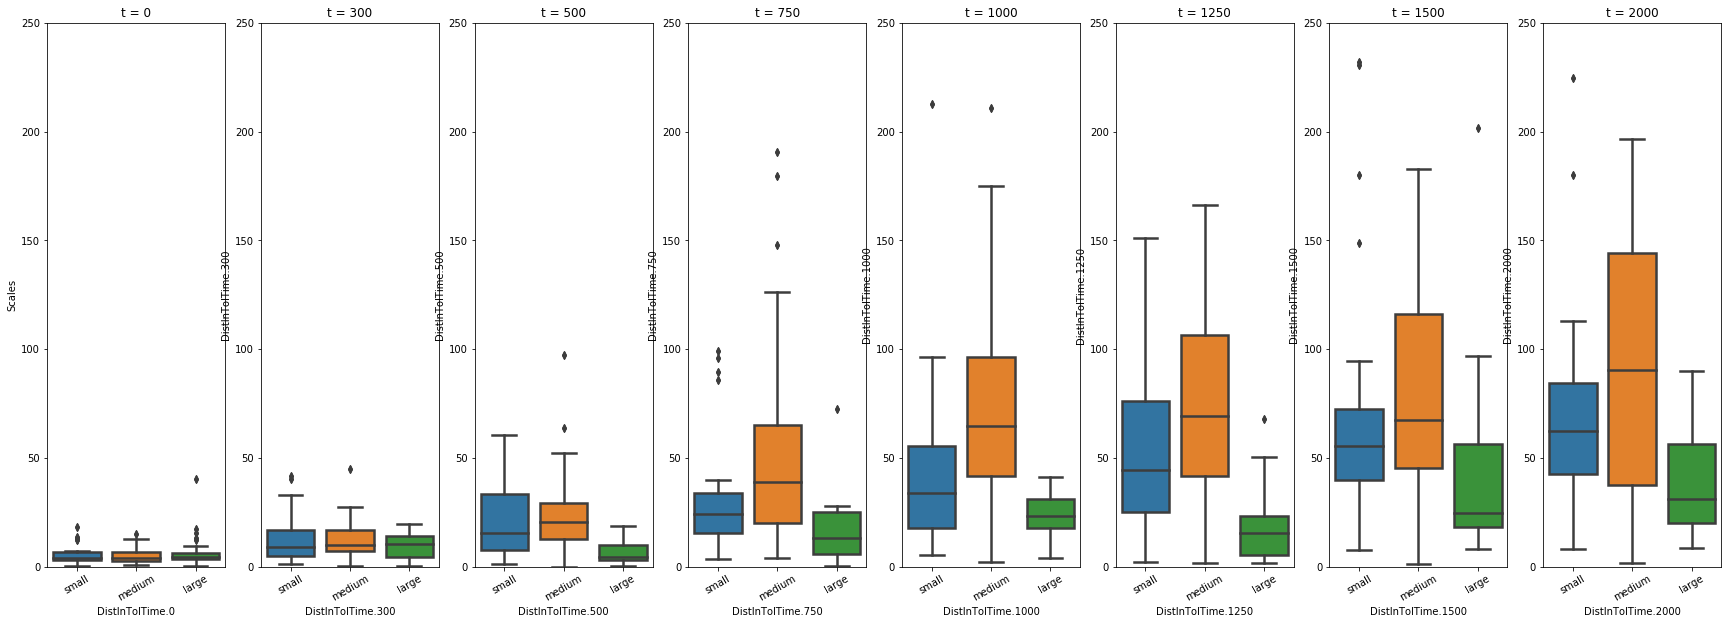

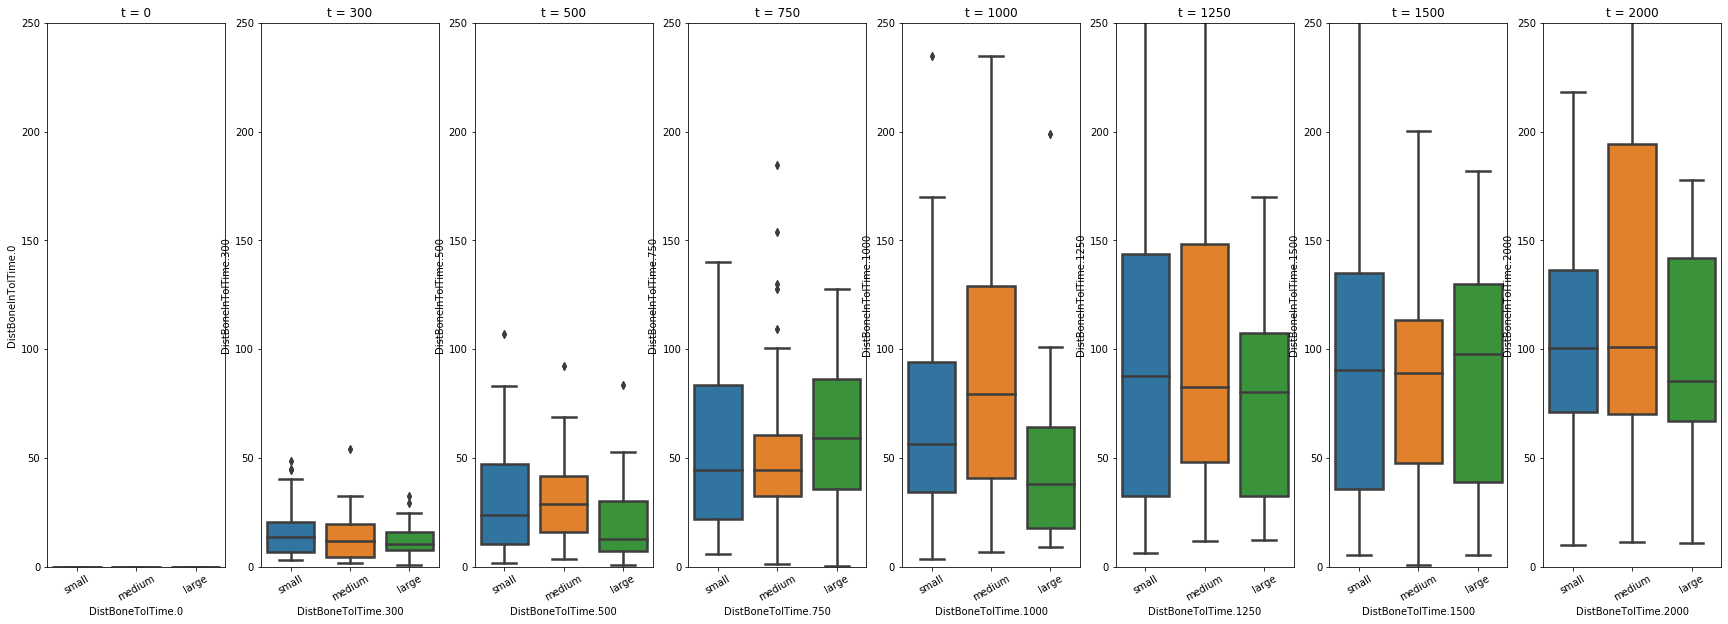

In [33]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    #nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistBoneTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [35]:
#nameAx = []
#nameFig = []
#tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#
#for i in range(0, len(tolTime)):
#    nameAx.append('ax'+str(i))
#    nameFig.append('g'+str(i))
#f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
#
#for i in range(0, len(tolTime)):
#            
#    nameFig[i] = sns.boxplot(x = "Scale", y = 'AbsSpeed.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#    #nameFig[i] = sns.lineplot(x = i, y = 'AbsSpeed.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#
#    
#    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
#    nameFig[0].set_ylabel('Scales')
#    nameFig[i].set_xlabel('Speed.'+str(tolTime[i]))
#    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
#    
#for ax in nameFig:
#    tl = ax.get_xticklabels()
#    ax.set_xticklabels(tl, rotation=30)
#    ax.set_ylim(0, 100)
#
#    

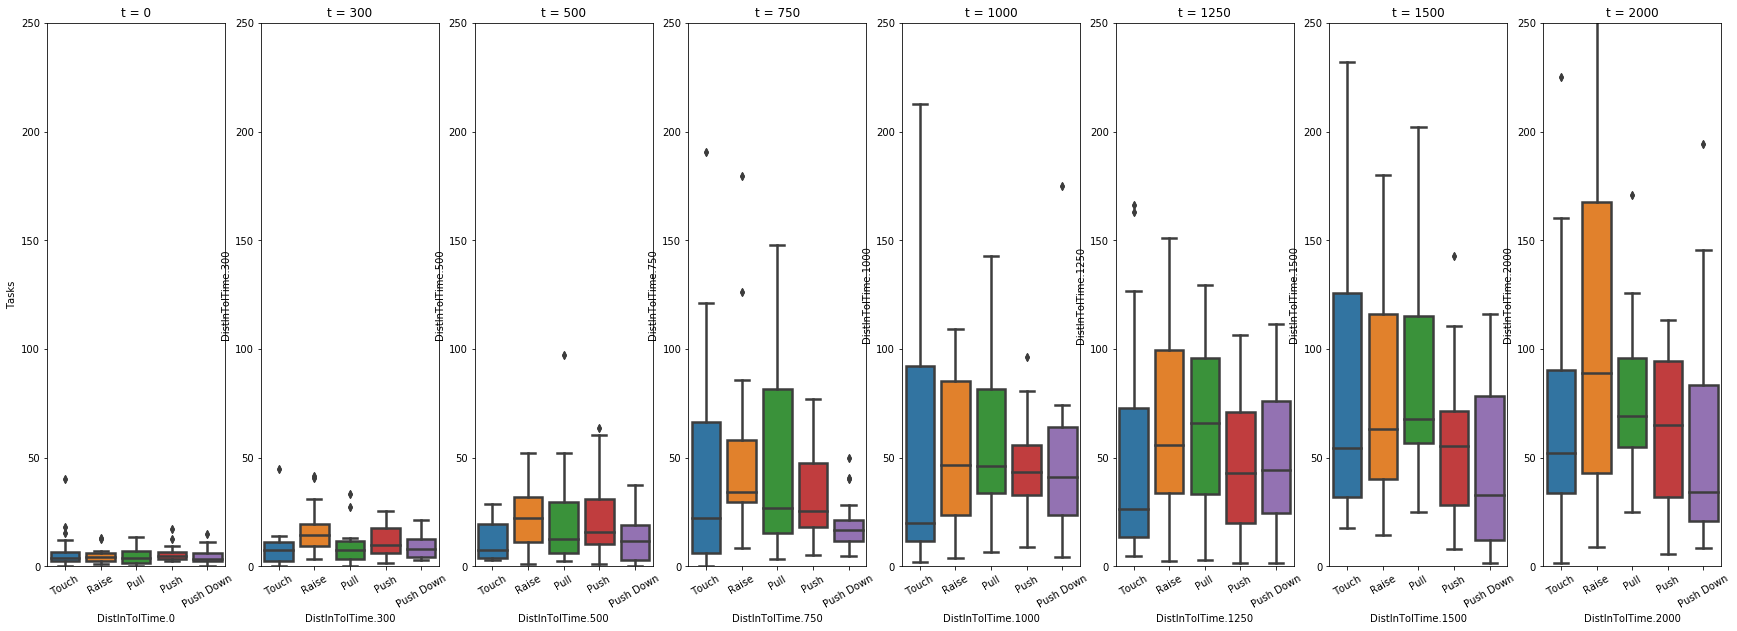

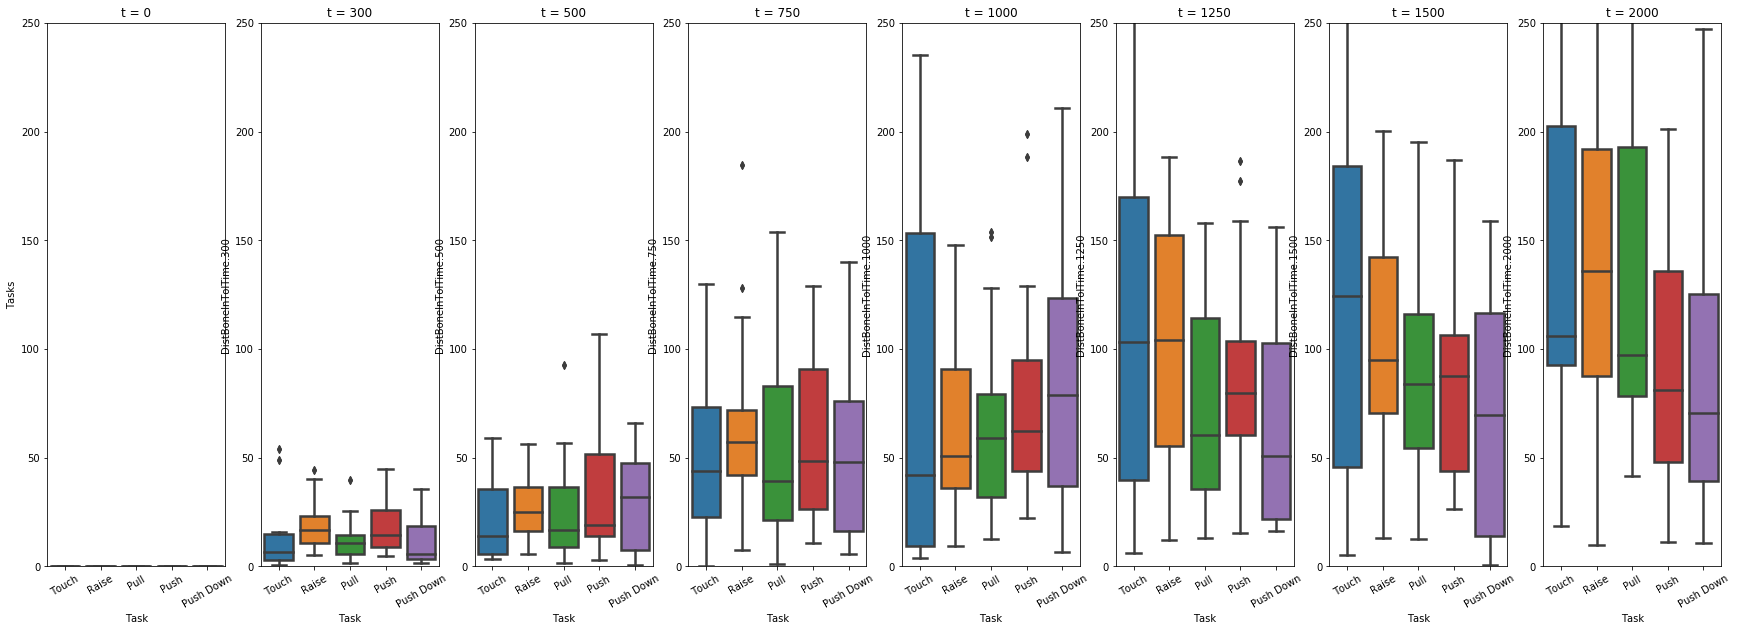

In [36]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)

    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [37]:
allConfig['Obj'].iloc[77], allConfig['Scale'].iloc[77], allConfig['Task'].iloc[77]

('obj6', 'medium', 'Pull')

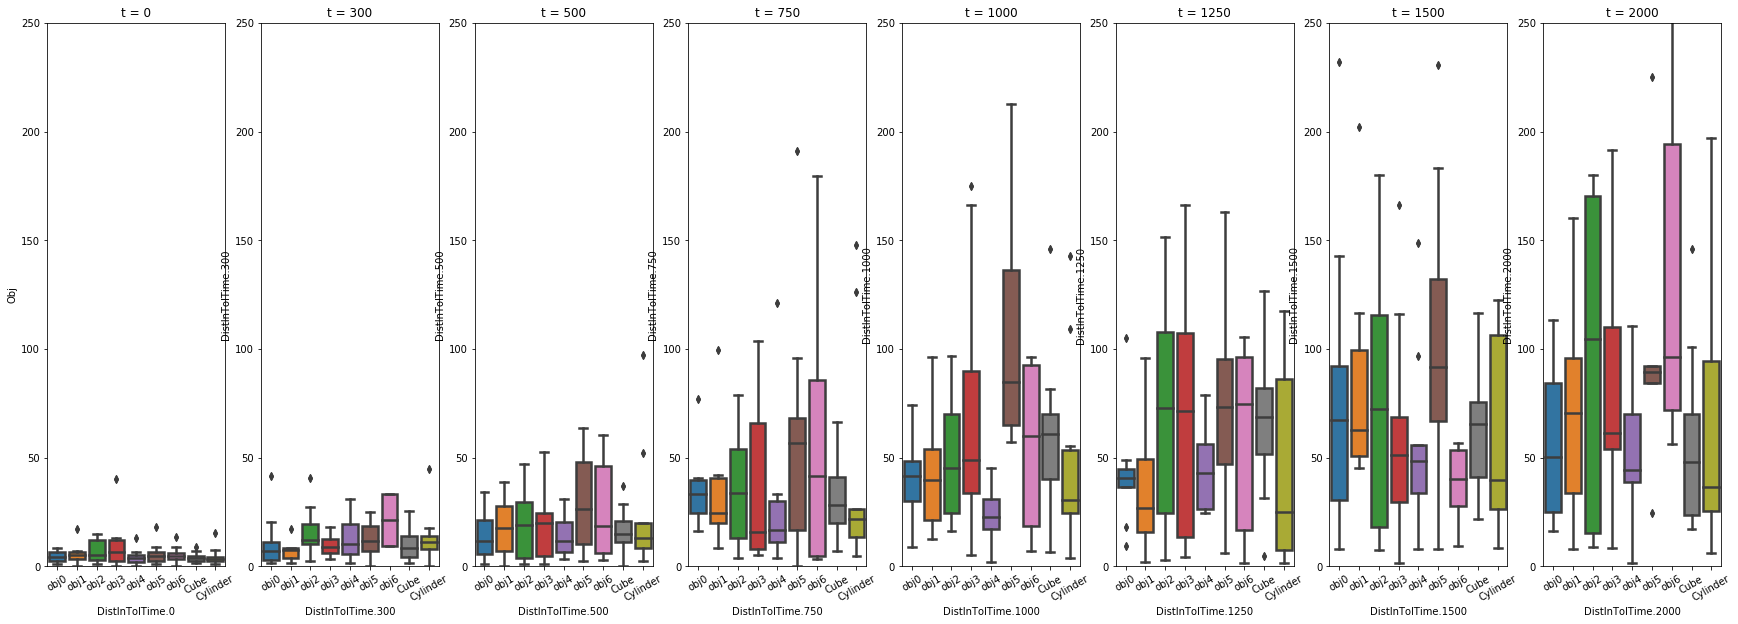

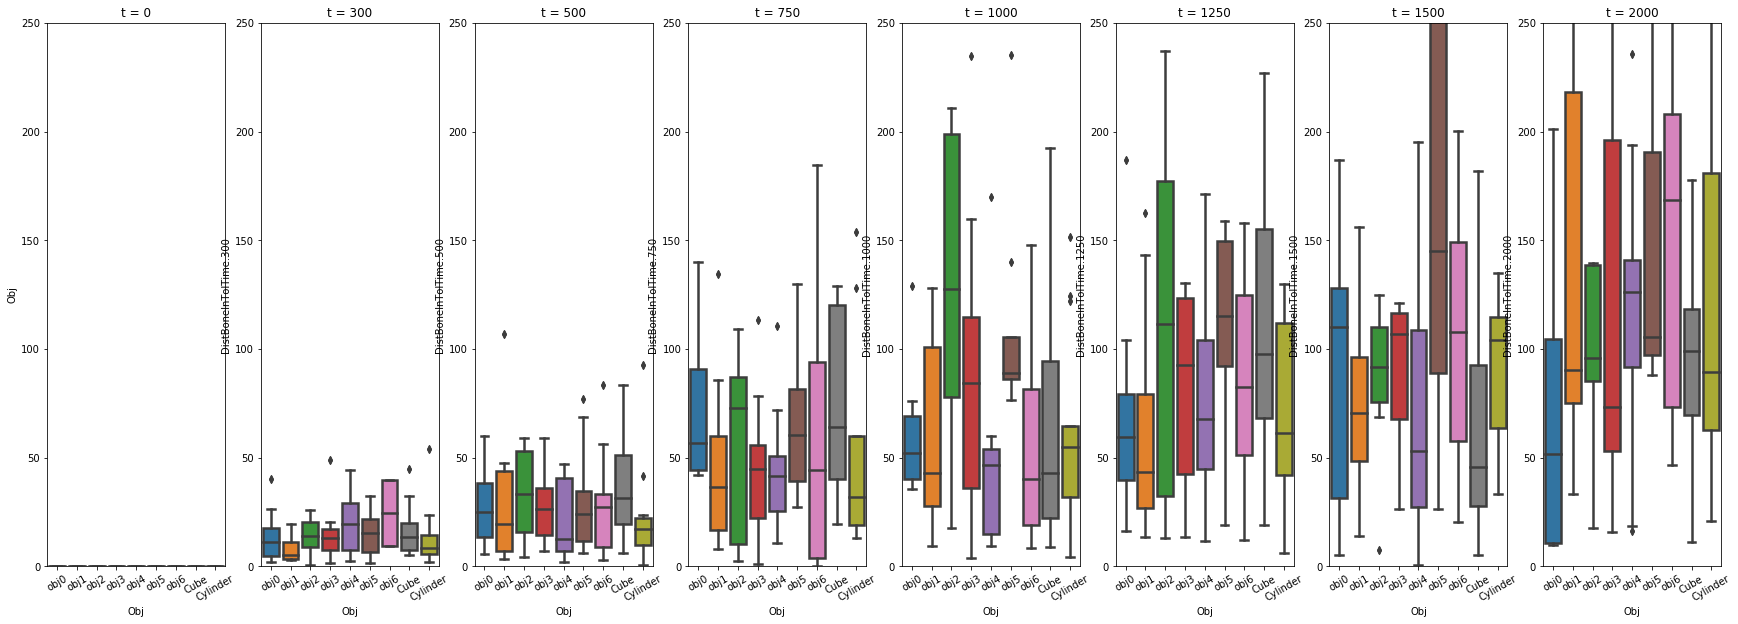

In [38]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [39]:
taskScale = pd.DataFrame()

tol = 300
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        scaleObj.loc[scales[size], objects[obj]] = mean/nbUsers

In [40]:
taskObj

Touch      Raise       Pull       Push  Push Down
obj0       3.521964  26.531475   6.800710  10.985691   6.495520
obj1       4.508393  17.181768   6.058085   8.294082   4.379825
obj2       6.725097  26.485948  17.268842  14.092375        NaN
obj3      12.739604   8.847876   3.292818   9.921748  12.606399
obj4       4.348280  18.797853   6.346511   9.106548  19.963950
obj5       5.675914  17.750357  11.631167  24.958609   5.711399
obj6            NaN   9.517632  33.130218        NaN        NaN
Cube      11.813892  10.930170   1.508683  12.808059   8.107446
Cylinder  27.970343  13.809646   7.114933  11.337349   2.923614

In [41]:
taskScale

Touch      Raise       Pull       Push  Push Down
small    7.668642  24.158808  10.033890   9.028884  11.520914
medium  11.007144  11.978596  11.198887  14.956357   8.236767
large    9.937549  13.557711   0.078918   9.757027   9.081753

In [42]:
scaleObj

obj0       obj1       obj2       obj3       obj4       obj5  \
small   15.485050   3.159172  16.605372   7.848185  16.291677  12.931945   
medium  10.882164  10.377778  18.879168  13.117724   6.607916  14.882161   
large    3.902373        NaN  11.345451   5.353904  18.989628   5.711399   

             obj6       Cube   Cylinder  
small   33.130218  17.628177   9.487270  
medium        NaN   6.050421  17.684004  
large    9.517632   9.249619   9.760328

In [43]:

tol = 1250


for users in range(0, nbUsers):
    cond = (allConfig['Task'] == 'Raise') & (allConfig['Scale'] == 'medium') & (allConfig['User'] == list_names[users])            
    print(1250, 'raise', list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Obj'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj5') & (allConfig['User'] == list_names[users])            
    print(1250, 'obj5',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj0') & (allConfig['User'] == list_names[users])            
    print(1250, 'obj0',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])

    
tol = 750


for users in range(0, nbUsers):
    cond = (allConfig['Task'] == 'Raise') & (allConfig['Scale'] == 'medium') & (allConfig['User'] == list_names[users])            
    print(750, 'raise', list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Obj'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj5') & (allConfig['User'] == list_names[users])            
    print(750, 'obj5',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj0') & (allConfig['User'] == list_names[users])            
    print(750, 'obj0',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])

1250 raise User3 46     38.290859
51     54.232600
56    107.736361
61    101.585088
66     33.806730
71    108.687100
76    320.197380
81     59.419133
86     99.409730
46     38.290859
51     54.232600
56    107.736361
61    101.585088
66     33.806730
71    108.687100
76    320.197380
81     59.419133
86     99.409730
Name: DistInTolTime.1250, dtype: float64 46        obj0
51        obj1
56        obj2
61        obj3
66        obj4
71        obj5
76        obj6
81        Cube
86    Cylinder
46        obj0
51        obj1
56        obj2
61        obj3
66        obj4
71        obj5
76        obj6
81        Cube
86    Cylinder
Name: Obj, dtype: object
1250 raise User3 46     38.290859
51     54.232600
56    107.736361
61    101.585088
66     33.806730
71    108.687100
76    320.197380
81     59.419133
86     99.409730
46     38.290859
51     54.232600
56    107.736361
61    101.585088
66     33.806730
71    108.687100
76    320.197380
81     59.419133
86     99.409730
Name: DistInTolTim

In [44]:
who = 56

allConfig[allConfig.index == who]['Obj'], allConfig[allConfig.index == who]['Task'], allConfig[allConfig.index == who]['Scale']

(56    obj2
 56    obj2
 Name: Obj, dtype: object, 56    Raise
 56    Raise
 Name: Task, dtype: object, 56    medium
 56    medium
 Name: Scale, dtype: object)

# Scales and Tasks

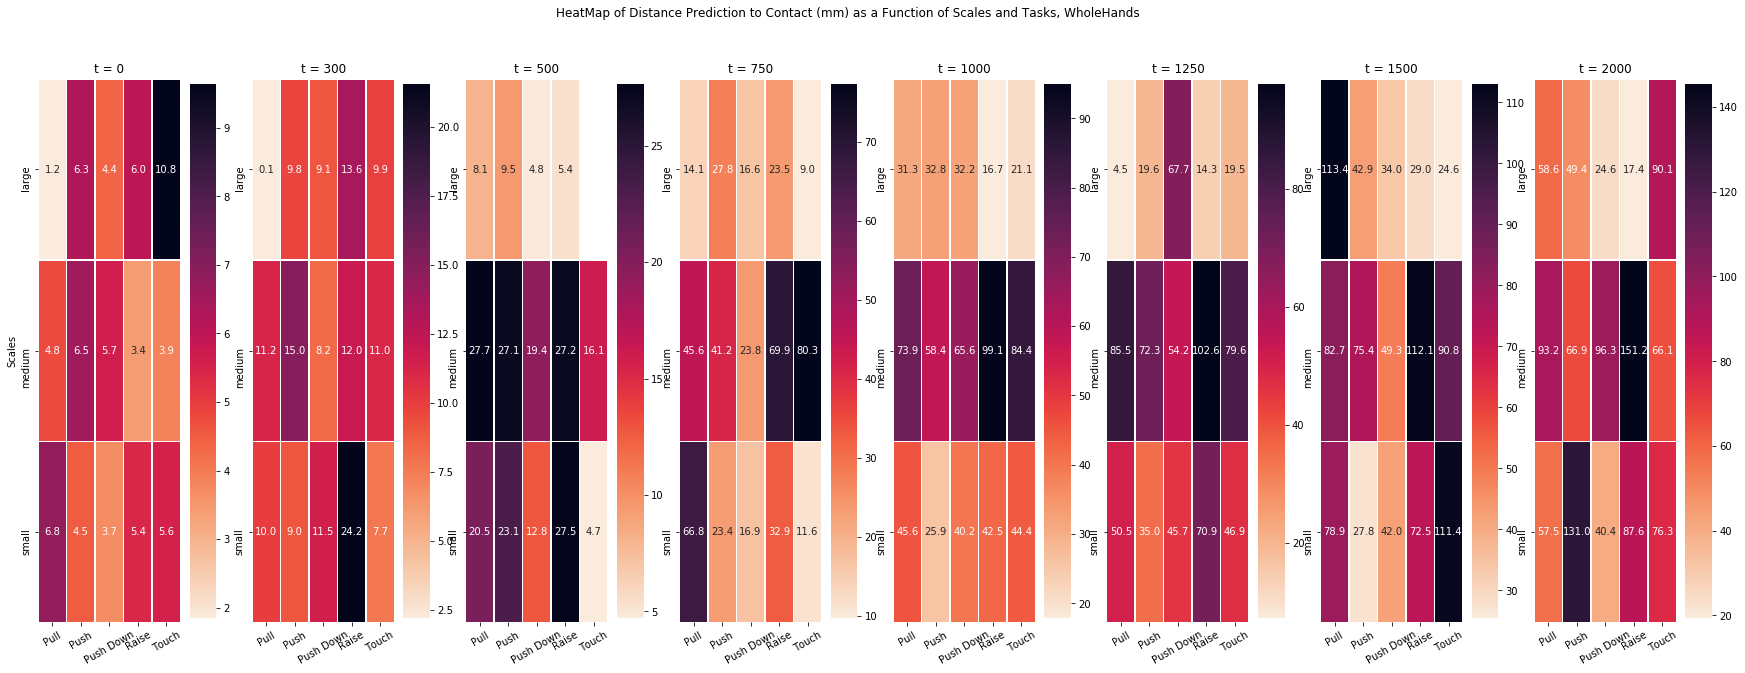

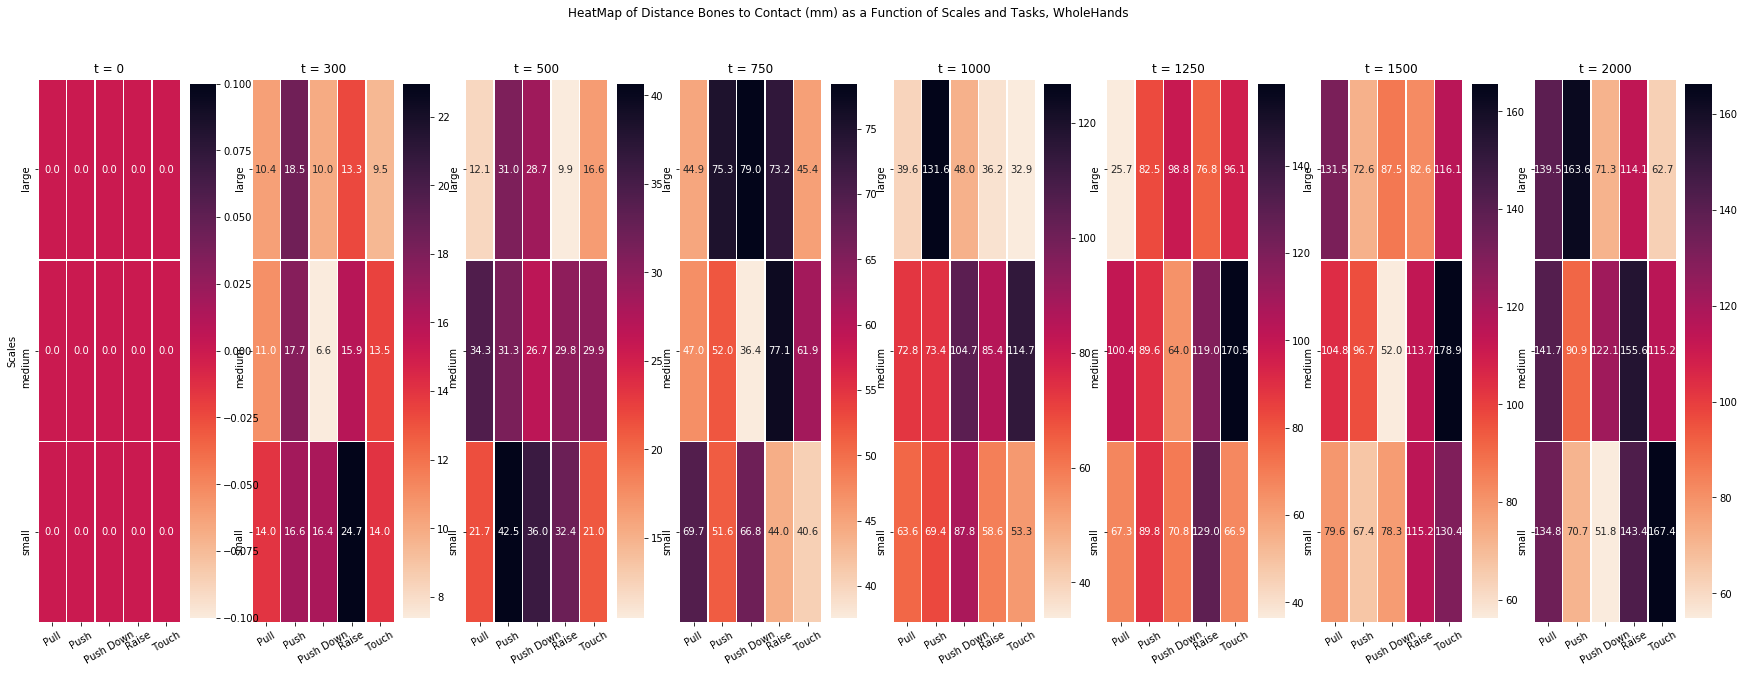

In [45]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, WholeHands')

plt.show()

In [46]:

tol = 300
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == 'obj6') & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)]
            

# Scales and Objects

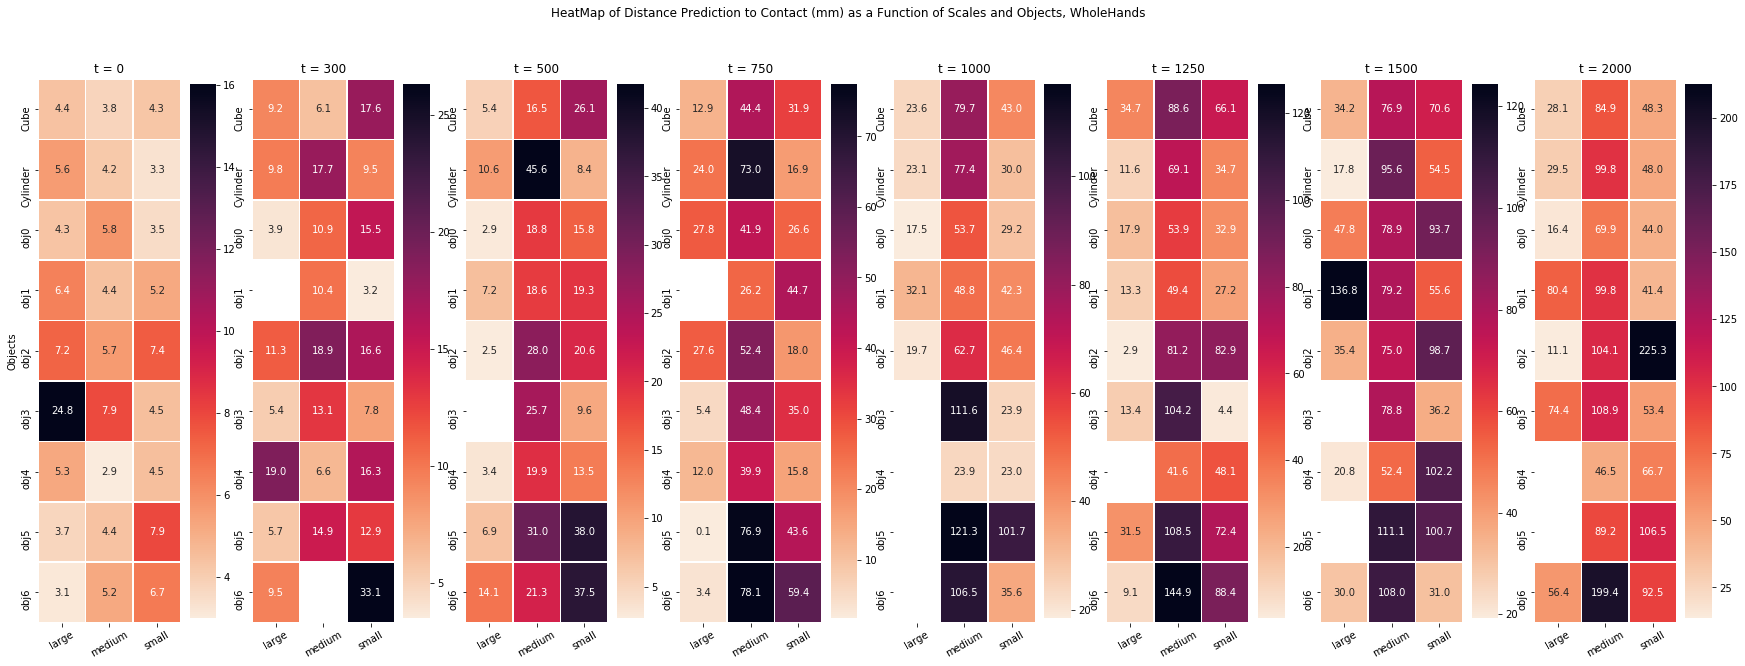

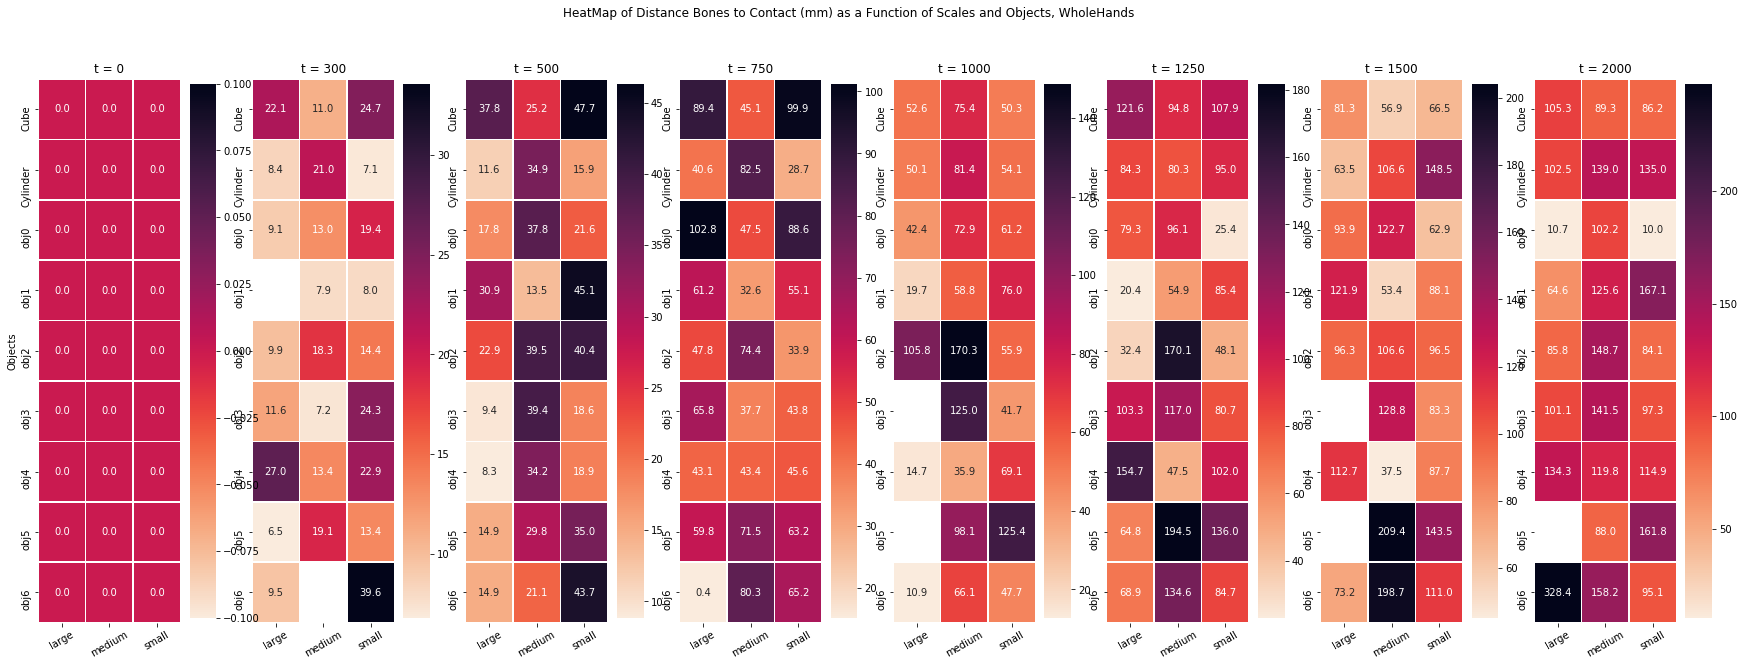

In [47]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])          
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers        
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Objects, WholeHands')

plt.show()

# Tasks and Objects

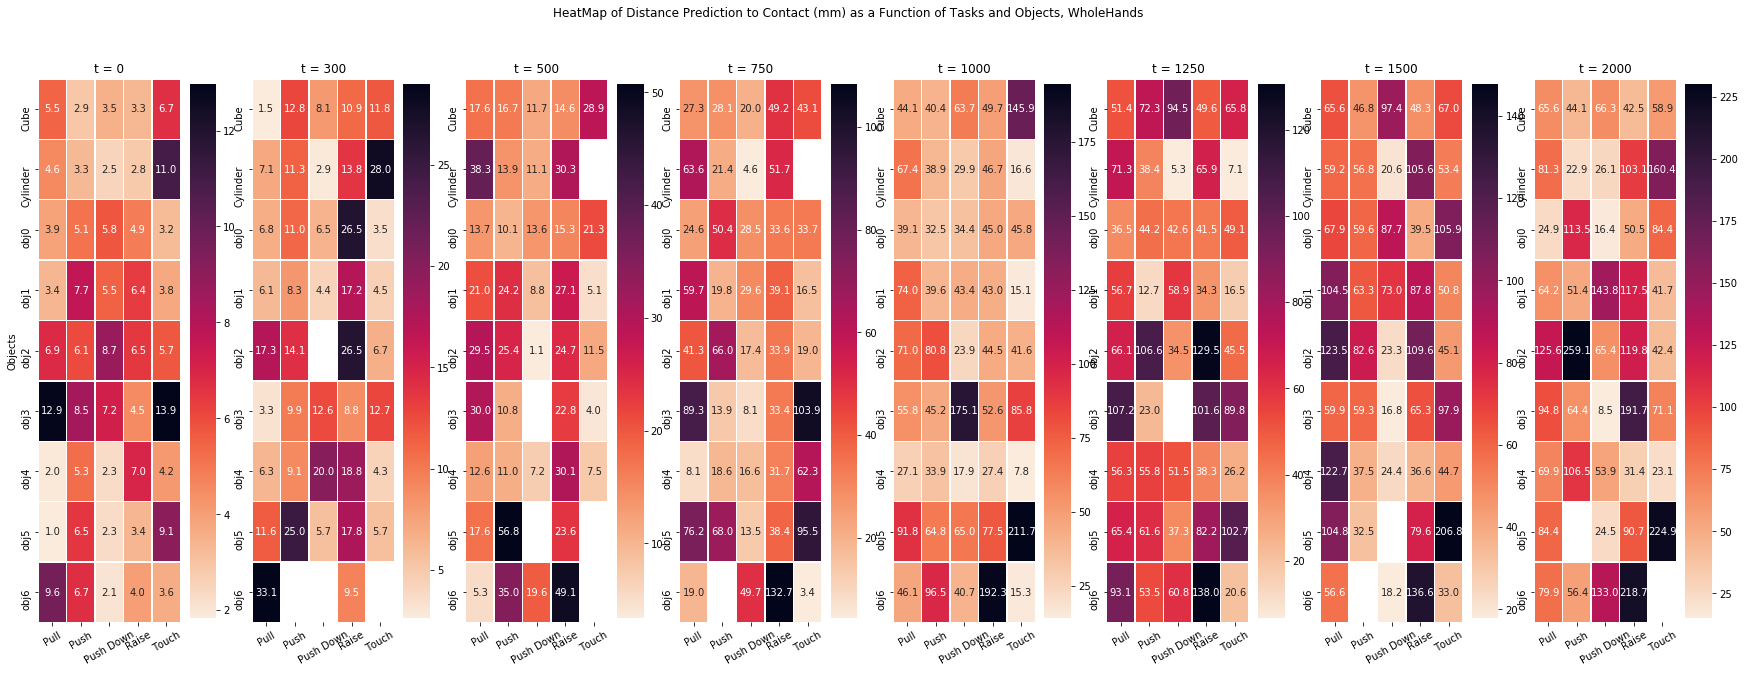

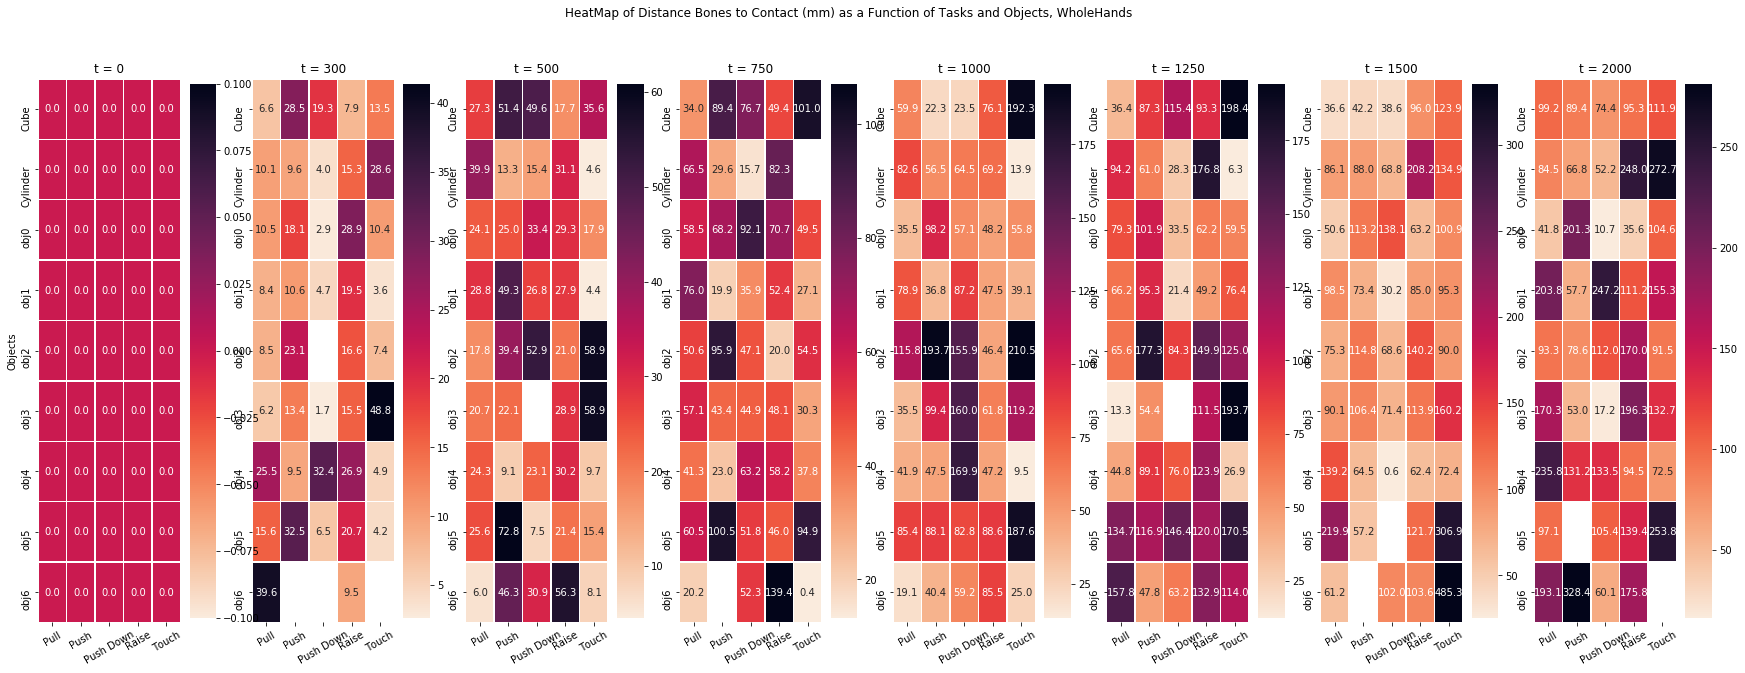

In [48]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Tasks and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Tasks and Objects, WholeHands')

plt.show()